<h2> DATA 319: Model-based and Data-based Methods for Data Analytics. Summer 2024 </h2>
<h3> Problem Set 6 </h3>
<h3> Team <i> (Insert your team number here) </i></h3>
<h3> Type students' names <i> (only those who contributed to the group work)</i> here</h3>

#### 1. Your goal is to perform an unsupervised clustering analysis on US crime data by states. This problem references the `US_State_Crime.csv` which includes features for various crimes both in frequencies and rates for 50 U.S. States.

##### (a) Load in the crime data and perform an exploratory analysis of the columns. Since your goal is to cluster the states by their crime properties a first natural step would be to identify and select the relevant numerical columns to use. Make some visualizations and report the summary statistics of the columns. Select a subset of the columns to use in your clustering analysis below and justify your decisions.

##### (b) Create a correlation matrix and a variance/covariance matrix for your chosen numerical columns. What do you observe from these matrices?

From these matrices, I see that there are pockets of strong and weak correlations between the columns. For example some of the total crime occurance columns strongly correlate with others. However, I'm not sure how much useful information can be gathered from the variance/covariance matrix because the scale is very wide.

##### (c) Use agglomerative hierarchical clustering to make a dendrogram for your chosen columns. Defend any choices you make while implementing the clustering method.
I chose to include all of the numeric columns in my clustering, I chose to do this over selecting just the columns that correlate because I didn't want the clusters to be heavily influenced by the correlated features.

##### (d) Determine an appropriate number of clusters from your dendrogram and make some visualizations with the points (representing states) colored by cluster.

##### (e) Repeat the computations in (c) and (d) with a non-agglomerative method (pick your favorite but justify why it is a reasonable choice for this data).

##### (f) Summarize your findings from (a-e) in a couple of paragraphs.

In [ ]:
#setup
%pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
#A 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import Data
crime_data = pd.read_csv('US_State_Crime.csv')

#rename index column
crime_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

#drop non-numeric columns
crime_data = crime_data.select_dtypes(include=['int64','float64'])

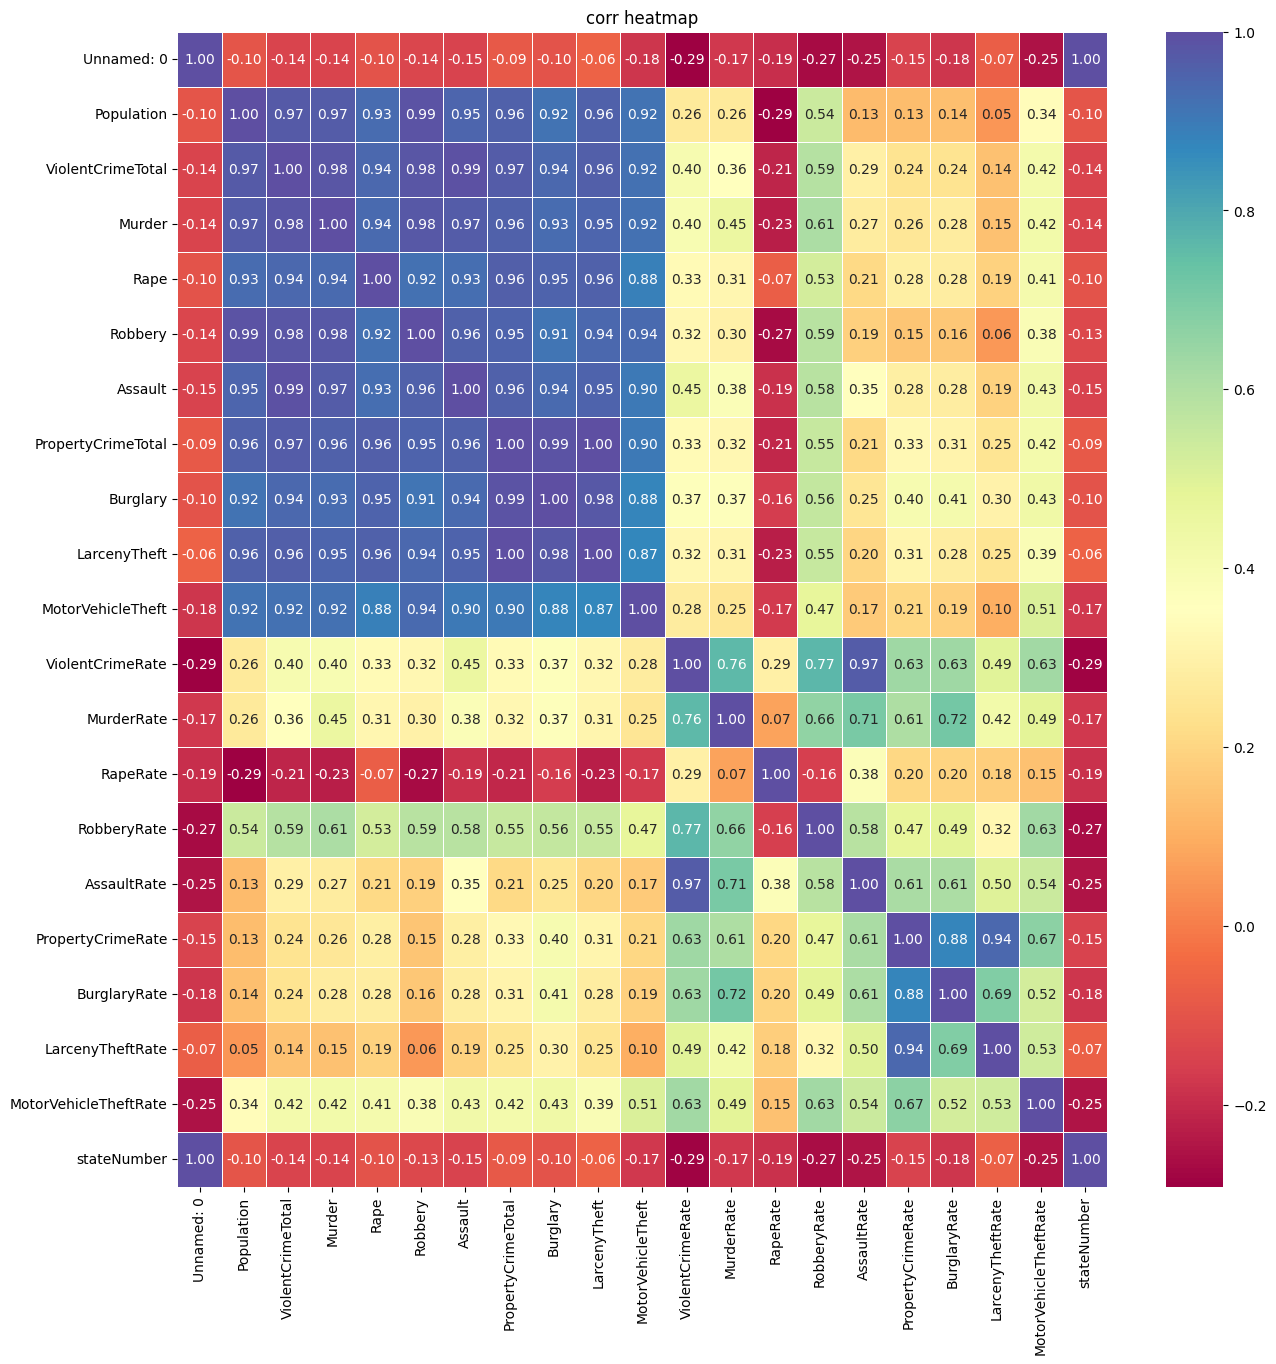

                         Unnamed: 0    Population  ViolentCrimeTotal  \
Unnamed: 0             2.194943e+02 -9.675159e+06      -7.054272e+04   
Population            -9.675159e+06  4.630395e+13       2.218544e+11   
ViolentCrimeTotal     -7.054272e+04  2.218544e+11       1.123592e+09   
Murder                -7.893669e+02  2.457534e+09       1.227239e+07   
Rape                  -2.776326e+03  1.158478e+10       5.746712e+07   
Robbery               -2.346383e+04  7.824186e+10       3.838336e+08   
Assault               -4.351320e+04  1.295703e+11       6.700186e+08   
PropertyCrimeTotal    -2.761732e+05  1.395874e+12       6.950374e+09   
Burglary              -8.067781e+04  3.250230e+11       1.647072e+09   
LarcenyTheft          -1.287185e+05  9.123582e+11       4.517805e+09   
MotorVehicleTheft     -6.677691e+04  1.584927e+11       7.854962e+08   
ViolentCrimeRate      -6.764934e+02  2.852297e+08       2.148963e+06   
MurderRate            -5.795755e+00  4.078981e+06       2.703536

In [9]:
#B
#Corr matrix

corr_matrix = crime_data.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'Spectral', linewidths = .5)
plt.title('corr heatmap')
plt.show()

#Cov Matrix
cov_matrix = crime_data.cov()
print(cov_matrix)

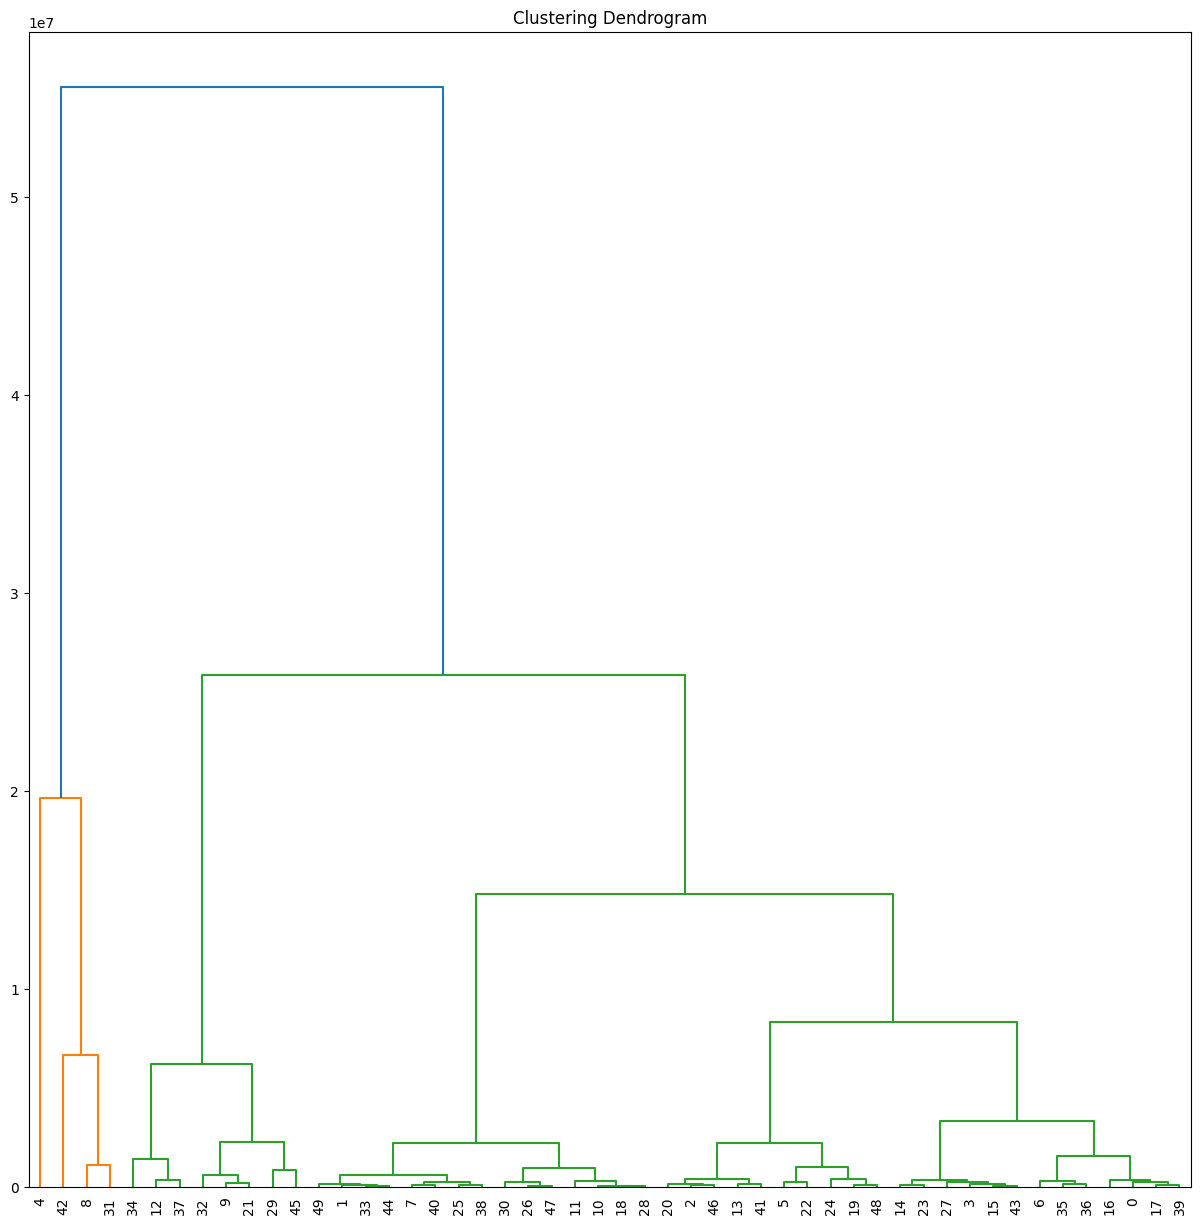

In [10]:
#C
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#standardize
StandardScaler = StandardScaler()
crime_data_standardized = StandardScaler.fit_transform(crime_data)

#PCA
pca = PCA()
data_pca = pca.fit_transform(crime_data_standardized)

#agglomerative Clustering
AggClustering = AgglomerativeClustering(n_clusters=3)
clusters = AggClustering.fit_predict(crime_data_standardized)

#dendrogram
linkage_matrix = linkage(crime_data_standardized, 'ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')



#### 2. This problem, motivated by a similar problem in Stanford CS246 course, asks you to implement an iterative version of the $k$-means algorithm and compare the performance of two different distance functions and two intialization strategies. Recall that $k$-means alternates between two steps:

##### &emsp; I Given a set of $k$ center points $C_i$ for the clusters, assign each datapoint to the ‘closest’ center

##### &emsp; II Update the center point for each cluster as the mean of all the data points assigned to that cluster

#### We then repeat these steps until either a convergence criterion is reached (usually that the sum of the distances for each point to its corresponding cluster center has converged to within some tolerance) or until a fixed number of iterations is completed.

##### (a) Write a python program that takes as input a dataset, a value for $k$, a set of starting centroids, and a maximum number of iterations and outputs the results of running the $k$-means algorithm, starting with those initial cluster points, for that number of steps. For each iteration of the algorithm you should also compute the current cost, defined as the sum over all points of the distance between that point and its cluster.

##### (b) Load in the input data from `text_data.txt` and the two sets of starting centers `centers_1.txt` and `centers_2.txt`. The rows of the data represent documents and the columns represent the relative importance of a collection of words. The first centers were chosen randomly and the second centers were chosen to be as far apart as possible.

##### (c) Run your algorithm on the text data from both sets of centers. For the cost computation, use the Euclidean distance between the data point and its center.

##### (d) Make a plot showing the cost as a function of iterations for both experiments and comment on your observations. Based on this experiment is a random choice of starting points or a maximally distant choice a better option? Justify your answer.

##### (e) Now rerun the experiment with both starting sets using the Manhattan metric instead of the Euclidean to define the distance between points and centers. 

##### (f) Make a plot showing the cost as a function of iterations for both experiments and comment on your observations. Based on this experiment is a random choice of starting points or a maximally distant choice a better option? Justify your answer. 

##### (g) What differences do you notice between the Euclidean and Manhattan approaches?